In [2]:
%pwd
%cd ..

/mnt/c/Users/ganzk/Desktop/lakes


In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
from libpysal.weights.contiguity import Queen
from libpysal import examples
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import splot

/home/ganzk/anaconda3/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [4]:
rf_resid = gpd.read_file("data_working/lagosus/lagos_us_depth_points.shp")
non_nan = rf_resid[~rf_resid["lake_maxde"].isna()]
non_nan.lake_maxde = non_nan.lake_maxde.astype(float)

In [18]:
from esda.moran import Moran

w = Queen.from_dataframe(non_nan)
w.transform = 'r'
moran = Moran(np.log10(non_nan["lake_maxde"].values), w)
moran.I

0.2597960409920679

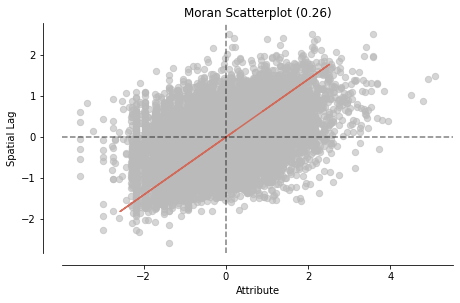

In [19]:
from splot.esda import moran_scatterplot
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.show()

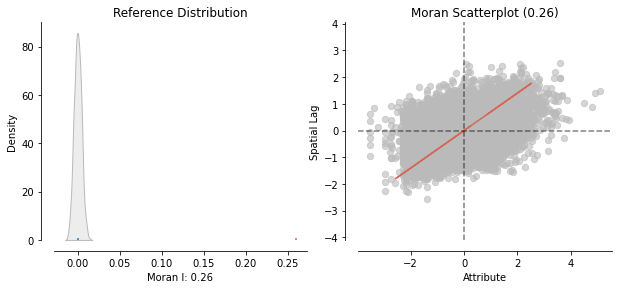

In [20]:
from splot.esda import plot_moran

plot_moran(moran, zstandard=True, figsize=(10,4))
plt.show()

In [21]:
print(moran.p_sim)

0.001


### Visualize the autocorrelation

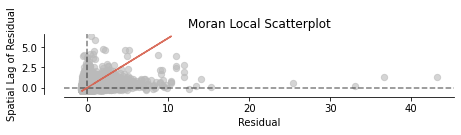

In [26]:
from splot.esda import moran_scatterplot
from esda.moran import Moran_Local

# calculate Moran_Local and plot
moran_loc = Moran_Local(non_nan["lake_maxde"].values, w)
fig, ax = moran_scatterplot(moran_loc)
ax.set_xlabel('Residual')
ax.set_ylabel('Spatial Lag of Residual')
plt.show()

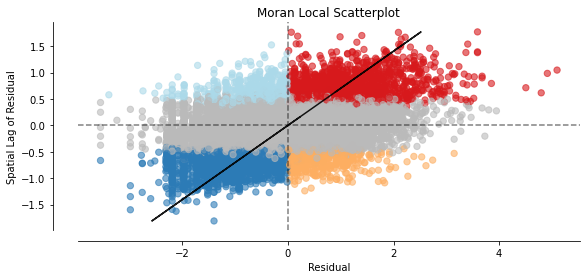

In [24]:
fig, ax = moran_scatterplot(moran_loc, p=0.05)
ax.set_xlabel('Residual')
ax.set_ylabel('Spatial Lag of Residual')
fig.set_size_inches(9, 9)
plt.show()

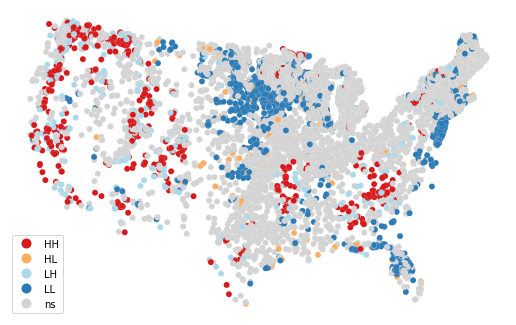

In [27]:
from splot.esda import lisa_cluster

lisa_cluster(moran_loc, non_nan, p=0.05, figsize = (9,9))
plt.show()

### Save out results

In [17]:
non_nan["cluster"] = moran_loc.q
non_nan["local_i"] = moran_loc.Is
#non_nan.to_file("data_working/lagosus/lagos_depths_moran.shp")